In [ ]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scipy import stats
from scipy.stats import skew, norm

### Dataset Loading

In [ ]:
!pip install -q kaggle

In [ ]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mohamedafsal007/house-price-dataset-of-india

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 33.2MB/s]


In [ ]:
!unzip /content/house-price-dataset-of-india.zip

Archive:  /content/house-price-dataset-of-india.zip
  inflating: House Price India.csv   


In [ ]:
df = pd.read_csv('House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

### Data Preprocessing


In [ ]:
# Null checking
df.isnull().any()

id                                       False
Date                                     False
number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
waterfront present                       False
number of views                          False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Postal Code                              False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from

In [ ]:
# Removing the Date column as instructed in the dataset
df = df.drop(["Date"], axis = 1)

In [ ]:
df.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
# Converting the 'number of bathrooms' into int64 type
df["number of bathrooms"] = df["number of bathrooms"].astype(np.int64)

In [ ]:
# Converting the 'number of floors' into int64 type
df["number of floors"] = df["number of floors"].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   number of bedrooms                     14620 non-null  int64  
 2   number of bathrooms                    14620 non-null  int64  
 3   living area                            14620 non-null  int64  
 4   lot area                               14620 non-null  int64  
 5   number of floors                       14620 non-null  int64  
 6   waterfront present                     14620 non-null  int64  
 7   number of views                        14620 non-null  int64  
 8   condition of the house                 14620 non-null  int64  
 9   grade of the house                     14620 non-null  int64  
 10  Area of the house(excluding basement)  14620 non-null  int64  
 11  Ar

<Axes: >

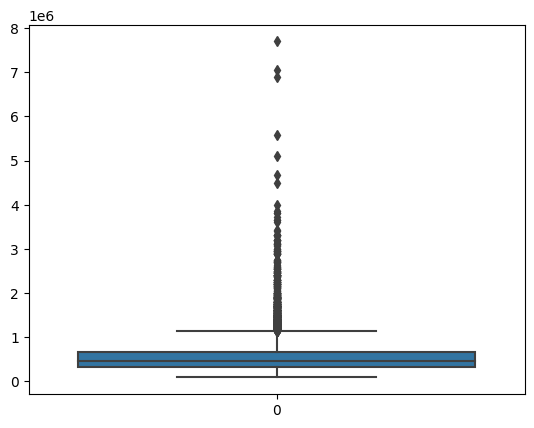

In [ ]:
sns.boxplot(df.Price)

In [ ]:
# Outlier Removal Using Z-Score
from scipy import stats

# Compute the mean and standard deviation of the dataset
mean = np.mean(df.Price)
std = np.std(df.Price)

# Calculate the Z-score for each observation
z_scores = np.abs(stats.zscore(df.Price))

# Define the threshold value for outliers (e.g. 3 or 2.5)
threshold = 3

# Identify the outliers
outliers = df.Price[z_scores > threshold]

# Remove the Outliers
df = df[z_scores <= threshold]

In [ ]:
df.describe()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.435600e+04,14356.000000,14356.000000,14356.000000,1.435600e+04,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,...,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,14356.000000,1.435600e+04
mean,6.762821e+09,3.362218,1.733700,2050.943160,1.494631e+04,1.446085,0.004667,0.205141,3.428323,7.632070,...,1970.891335,86.333380,122032.913277,52.791843,-114.403664,1971.889384,12674.479660,2.010309,64.937657,5.065561e+05
std,6.124889e+03,0.928682,0.699651,844.429945,3.779462e+04,0.551952,0.068158,0.709730,0.662329,1.114441,...,29.402226,406.047488,19.046145,0.138435,0.142110,664.447881,26130.497784,0.817199,8.937303,2.590362e+05
min,6.762810e+09,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762816e+09,3.000000,1.000000,1430.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,122017.000000,52.704175,-114.520000,1480.000000,5050.000000,1.000000,57.000000,3.199500e+05
50%,6.762821e+09,3.000000,2.000000,1910.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,122031.000000,52.804500,-114.421000,1830.000000,7578.000000,2.000000,65.000000,4.450000e+05
75%,6.762826e+09,4.000000,2.000000,2530.000000,1.058000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1996.000000,0.000000,122048.000000,52.909700,-114.313750,2350.000000,10029.250000,3.000000,73.000000,6.282500e+05
max,6.762832e+09,33.000000,7.000000,7480.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,12.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,5790.000000,560617.000000,3.000000,80.000000,1.640000e+06


In [ ]:
X = df.drop(["Price"], axis = 1)
y = df["Price"]

In [ ]:
# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Scaling the input features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-179-19ed99972f4b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"],fit=norm);


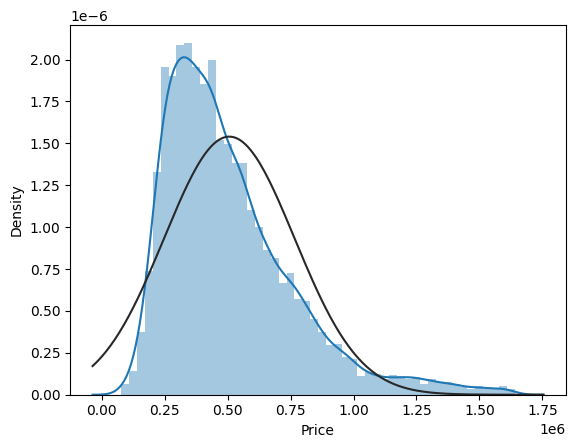

In [ ]:
# kernel density plot
sns.distplot(df["Price"],fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');

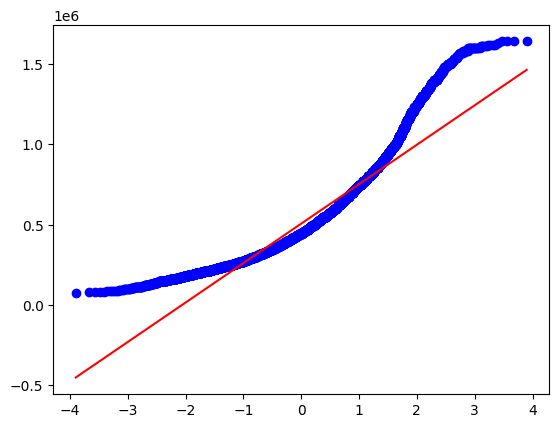

In [ ]:
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["Price"]);
#QQ plot
fig = plt.figure()
res = stats.probplot(df["Price"], plot=plt)
plt.show()

In [ ]:
print("skewness: %f" % df["Price"].skew())
print("kurtosis: %f" % df["Price"].kurt())

skewness: 1.373092
kurtosis: 2.269832


In [ ]:
# Applying log transform to fix the highly left skewed data
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test);

In [ ]:
print("skewness: %f" % y_train_log.skew())
print("kurtosis: %f" % y_train_log.kurt())

skewness: 0.068531
kurtosis: -0.205640


### Building the ANN model

In [ ]:
# Defining the Model
model = Sequential([
   Dense(32, activation='relu'),
   Dense(128, activation='relu'),
   Dense(128, activation='softplus'),
   Dense(32, activation='relu'),
   Dense(1, activation='linear')
])

In [ ]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [ ]:
# Fitting the model
history = model.fit(X_train, y_train_log, validation_data=(X_test, y_test_log), epochs=100, batch_size=32, 
                    callbacks = [early_stop], 
                    verbose = 2,
                    validation_split = 0.2)


Epoch 1/100
359/359 - 3s - loss: 1.4191 - val_loss: 0.2061 - 3s/epoch - 8ms/step
Epoch 2/100
359/359 - 1s - loss: 0.1412 - val_loss: 0.0793 - 913ms/epoch - 3ms/step
Epoch 3/100
359/359 - 1s - loss: 0.0740 - val_loss: 0.1483 - 827ms/epoch - 2ms/step
Epoch 4/100
359/359 - 1s - loss: 0.0576 - val_loss: 0.0508 - 819ms/epoch - 2ms/step
Epoch 5/100
359/359 - 1s - loss: 0.0576 - val_loss: 0.0495 - 824ms/epoch - 2ms/step
Epoch 6/100
359/359 - 1s - loss: 0.0464 - val_loss: 0.0367 - 809ms/epoch - 2ms/step
Epoch 7/100
359/359 - 1s - loss: 0.0451 - val_loss: 0.0338 - 801ms/epoch - 2ms/step
Epoch 8/100
359/359 - 1s - loss: 0.0420 - val_loss: 0.0552 - 778ms/epoch - 2ms/step
Epoch 9/100
359/359 - 1s - loss: 0.0447 - val_loss: 0.0374 - 786ms/epoch - 2ms/step
Epoch 10/100
359/359 - 1s - loss: 0.0405 - val_loss: 0.0326 - 804ms/epoch - 2ms/step
Epoch 11/100
359/359 - 1s - loss: 0.0369 - val_loss: 0.0283 - 811ms/epoch - 2ms/step
Epoch 12/100
359/359 - 1s - loss: 0.0332 - val_loss: 0.0291 - 831ms/epoch - 2

### Testing the Model


In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test_log)
print("Test Loss:", test_loss)

90/90 [==============================] - 0s 2ms/step - loss: 0.0117
Test Loss: 0.01166222058236599


In [195]:
# Making predictions from the testset and applying inverse log for predictions
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

90/90 [==============================] - 0s 2ms/step


In [196]:
# Flatten the data and appling inverse log for test
y_test = np.expm1(y_test_log).values.flatten()
y_pred = y_pred.flatten()

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = np.mean(np.square(y_test - y_pred))
print("Mean Squared Error (MSE): ", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Calculate R-Squared (R²) score
r2 = r2_score(y_test, y_pred)
print("R-Squared (R²) score: ", r2)

Mean Squared Error (MSE):  94207854.59444474
Root Mean Squared Error (RMSE):  9706.073077946856
Mean Absolute Error (MAE):  4917.379825687675
R-Squared (R²) score:  0.9985686216832247


In [200]:
df_ans = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print(df_ans)

        y_test        y_pred
0     359950.0  358369.25000
1     774000.0  763115.50000
2     482000.0  482259.56250
3     848000.0  840102.31250
4     845000.0  844699.25000
...        ...           ...
2867  250000.0  256305.00000
2868  549000.0  542695.06250
2869  500000.0  497433.40625
2870  585000.0  586133.93750
2871  820000.0  821465.87500

[2872 rows x 2 columns]
